In [1]:
import pandas as pd

# get top 100 positive/negative zscore of https://doi.org/10.1016/j.cell.2020.10.028

In [2]:
all_df = pd.read_excel('./sourcedata/33147444/mmc2.xlsx')

In [3]:
all_df

,Gene,n_guides,MERS-CoV T1015N,MERS-CoV,HKU5-SARS-CoV-1-S,VSV-SARS-CoV-2-S,SARS-CoV-2 Cas9-V2 Avg.
0,A1BG,4,-0.009031,1.121373,0.364666,0.593082,-0.658483
1,A1CF,4,-0.041919,-0.520937,1.293811,0.870485,0.291824
2,A2ML1,4,-1.413232,-1.259393,-1.211113,-0.160370,0.758146
3,A3GALT2,4,-1.389358,-0.555885,-0.822647,-1.623208,0.460144
4,A4GALT,4,-1.189411,-0.129320,0.515648,-0.864303,0.976356
...,...,...,...,...,...,...,...
21667,ZYG11A,4,0.005925,1.066707,0.157970,-1.165950,-0.824200
21668,ZYG11B,4,-0.040399,0.777580,-1.038493,-0.078519,-0.696398
21669,ZYX,4,-1.423361,-2.242158,-1.870252,-1.873452,0.639377
21670,ZZEF1,4,0.689855,2.595655,-1.083384,-1.227102,0.463452


In [26]:
top_100 = {}
# for column in ['MERS-CoV T1015N', 'MERS-CoV', 'HKU5-SARS-CoV-1-S',
#        'VSV-SARS-CoV-2-S', 'SARS-CoV-2 Cas9-V2 Avg.']:
for column in ['MERS-CoV', 'HKU5-SARS-CoV-1-S', 'SARS-CoV-2 Cas9-V2 Avg.']:
    negative = all_df.sort_values(column,ascending=True)[:100][['Gene',column]]
    positive = all_df.sort_values(column,ascending=False)[:100][['Gene',column]]
    df = pd.concat([negative,positive],ignore_index=True)
    df = df.rename(columns={column:'zscore'})
    df['Virus'] = column
    top_100[column] = df

In [27]:
top_100['HKU5-SARS-CoV-1-S']['Virus'] = 'SARS-CoV'
# top_100['MERS-CoV T1015N']['Virus'] = 'MERS'
top_100['MERS-CoV']['Virus'] = 'MERS-CoV'
# top_100['VSV-SARS-CoV-2-S']['Virus'] = 'SARS-CoV2'
top_100['SARS-CoV-2 Cas9-V2 Avg.']['Virus'] = 'SARS-CoV2'
all_top_100 = pd.concat(top_100.values(),ignore_index=True)

all_top_100 = all_top_100.drop_duplicates(['Gene','Virus'])
all_top_100['Direction'] = all_top_100['zscore']/all_top_100['zscore'].abs()

In [28]:
all_top_100['Host Gene'] = all_top_100['Gene']
all_top_100['Host Gene Type'] = 'CRISPR-Screening'
all_top_100['Direciton Type'] = 'CRISPR-Screening'
all_top_100['Host Gene Source'] = 33147444
all_top_100['Direction Source'] = 33147444
all_top_100['Direction'] = all_top_100['Direction'].astype(int)
all_top_100 = all_top_100[['Virus','Host Gene','Host Gene Type',
                           'Host Gene Source','Direction','Direciton Type',
                           'Direction Source']]

In [29]:
all_top_100.to_excel('./33147444.xlsx',index=False)

# concat all crispr

In [34]:
pmids = [
'33574281',
'33147445',
'33686287',
'33333024',
'33147444',
'33382968',
]

In [35]:
all_crispr = []
for pmid in pmids:
    df = pd.read_excel(f'./{pmid}.xlsx')
    all_crispr.append(df)
all_crispr = pd.concat(all_crispr,ignore_index=True)

## check if conflict directions

In [45]:
conflict_genes = []
for (gene,virus),sub_df in all_crispr.groupby(['Host Gene','Virus']):
    if len(sub_df['Direction'].unique()) > 1:
        print(gene,virus)
        print(sub_df.iloc[:,:5])
        conflict_genes.append(gene)
#         break
all_crispr = all_crispr[~all_crispr['Host Gene'].isin(conflict_genes)]

C16orf62 SARS-CoV2
          Virus Host Gene    Host Gene Type  Host Gene Source  Direction
3     SARS-CoV2  C16orf62  CRISPR-Screening          33574281          1
1234  SARS-CoV2  C16orf62  CRISPR-Screening          33382968         -1
CABIN1 SARS-CoV2
          Virus Host Gene    Host Gene Type  Host Gene Source  Direction
901   SARS-CoV2    CABIN1  CRISPR-Screening          33147444         -1
1195  SARS-CoV2    CABIN1  CRISPR-Screening          33382968          1
HIRA SARS-CoV2
          Virus Host Gene    Host Gene Type  Host Gene Source  Direction
458   SARS-CoV2      HIRA  CRISPR-Screening          33333024          1
900   SARS-CoV2      HIRA  CRISPR-Screening          33147444         -1
1125  SARS-CoV2      HIRA  CRISPR-Screening          33382968          1
LCMT1 SARS-CoV2
          Virus Host Gene    Host Gene Type  Host Gene Source  Direction
259   SARS-CoV2     LCMT1  CRISPR-Screening          33686287         -1
1152  SARS-CoV2     LCMT1  CRISPR-Screening          3338

In [68]:
all_crispr.to_excel('ALL_CRISPR.xlsx',index=False)

## overlap

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

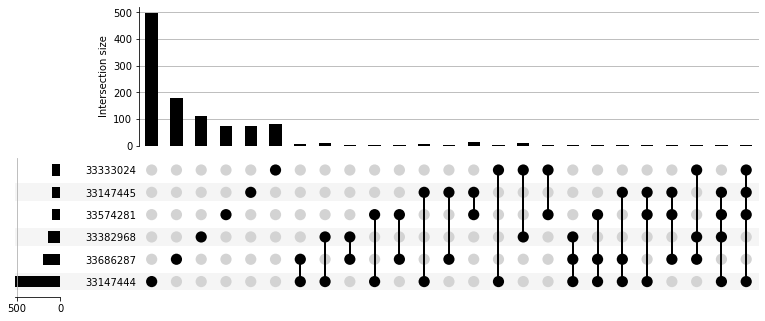

In [65]:
a = all_crispr[['Host Gene','Host Gene Source']].copy()
a['count'] = 1
a = a.drop_duplicates()
b = pd.pivot(a,columns='Host Gene Source',index='Host Gene',values='count').fillna(0)

from upsetplot import plot
plot(b.value_counts())

In [66]:
b['count'] = b.sum(axis=1)
b.sort_values('count',ascending=False)[:20]

Host Gene Source,33147444,33147445,33333024,33382968,33574281,33686287,count
Host Gene,,,,,,,
CTSL,1.0,1.0,0.0,1.0,1.0,0.0,4.0
ACE2,1.0,1.0,1.0,0.0,1.0,0.0,4.0
B4GALT7,0.0,0.0,1.0,1.0,0.0,1.0,3.0
CCZ1B,0.0,1.0,0.0,0.0,1.0,1.0,3.0
TMEM41B,1.0,0.0,0.0,1.0,0.0,1.0,3.0
ARPC4,0.0,1.0,0.0,0.0,1.0,1.0,3.0
ARID1A,1.0,1.0,0.0,0.0,0.0,1.0,3.0
EXT1,0.0,0.0,1.0,1.0,0.0,1.0,3.0
SMARCB1,1.0,1.0,0.0,0.0,1.0,0.0,3.0


In [71]:
zww = pd.read_excel('../all_source_new.xlsx')
zww = zww[zww['Host Gene Type']=='CRISPR-Screening']

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

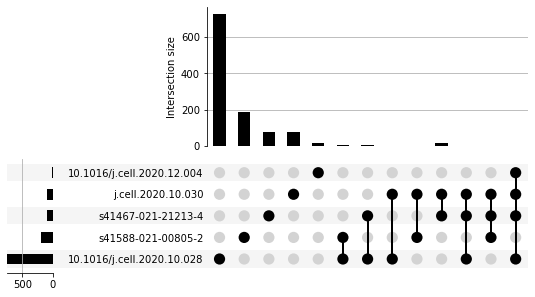

In [73]:
a = zww[['Host Gene','Host Gene Source']].copy()
a['count'] = 1
a = a.drop_duplicates()
b = pd.pivot(a,columns='Host Gene Source',index='Host Gene',values='count').fillna(0)

from upsetplot import plot
plot(b.value_counts())

In [74]:
b['count'] = b.sum(axis=1)
b.sort_values('count',ascending=False)[:20]

Host Gene Source,10.1016/j.cell.2020.10.028,10.1016/j.cell.2020.12.004,j.cell.2020.10.030,s41467-021-21213-4,s41588-021-00805-2,count
Host Gene,,,,,,
ACE2,1.0,1.0,1.0,1.0,0.0,4.0
ARPC4,0.0,0.0,1.0,1.0,1.0,3.0
CTSL,1.0,0.0,1.0,1.0,0.0,3.0
COMMD4,0.0,0.0,1.0,1.0,0.0,2.0
CCDC93,0.0,0.0,1.0,1.0,0.0,2.0
PHIP,1.0,0.0,0.0,1.0,0.0,2.0
ATP6AP1,0.0,0.0,1.0,0.0,1.0,2.0
COMMD10,0.0,0.0,1.0,1.0,0.0,2.0
COMMD2,0.0,0.0,1.0,1.0,0.0,2.0
